# Tarea 1 - Electronica Aplicada 1
***

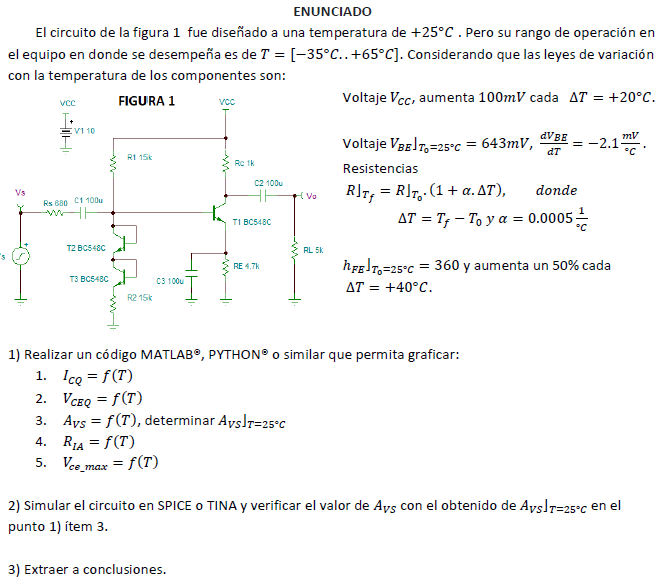

In [1]:
from IPython.display import Image

fig = Image(filename=('./enunciado.png'))
fig

## 1) Resolucion - Script en Python
***
### Modulos utilizados:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

### Constantes:

In [4]:
#============CONSTANTES===================
TA = 25 #Temperatura ambiente en Celsius
TO = 273.15 #Temperatura ambiente en Kelvin
ALFA = 0.0005
K = 1.380649e-23 #Cte de Boltzmann
q = 1.602e-19 #Carga del electron

### Funciones utilizadas:

In [5]:
def var_VCC(VCC_n, T):
    return VCC_n + (100e-3*(T-TA)/20)

def var_VBE(VBE_n, T):
    return VBE_n - (-2.1e-3*(T-TA))

def var_Resistencias(R_n, T):
    return R_n*(1+ALFA*(T-TA))

def var_hFE(hFE_n, T):
    return hFE_n + (0.5*hFE_n*(T-TA)/40)

def R_Paralelo(Ra, Rb):
    return (Ra*Rb) / (Ra+Rb)

def ICQ_T(VCC, VBE, R1, R2, RE, hFE, RB):
    return ( (VCC*(R2/(R1+R2) )) + (VBE*(((2*R1)/(R1+R2))-1)) ) / ( RE + RB/hFE )

def VCEQ_T(VCC, ICQ, RC, RE):
    return VCC - ICQ * (RE + RC)

def rbe(VT, IBQ):
    ru = VT/IBQ #Resistencia de la juntura de un diodo
    rb = 0 #Resistencia del cuerpo(la considere nula)
    rbe = ru + rb
    return rbe

def AV_T(hFE, RD, RI):
    return -hFE*RD/RI

def AVS_T(RIA, RS, AV):
    return (AV*RIA)/(RIA+RS)

def VBB_T(VCC, VBE, R1, R2):
    return VCC*(R2/(R1+R2))+(2*VBE)*(R1/(R1+R2))

def VCE_MAX_T(VCEQ, ICQ, VCE_sat, RD):
    vomax1 = VCEQ - VCE_sat
    vomax2 = ICQ * RD
    if (vomax1 > vomax2).all():
        return vomax2
    else:
        return vomax1

### Calculo de factores que varian con la temperatura:

In [6]:
T = np.linspace(-35, 65, 1000) #Vector de temperaturas de -35 grados Celsius
                                #a 65 grados Celsius con step=0.1
#=============Resistencias normalizadas===============
R1_n = 15000
R2_n = 15000
RC_n = 1000
RE_n = 4700
RL_n = 5000
RS_n = 680
#============Tensiones===================
VCC_n = 10
VBE_n = 0.7
VCE_sat = 1
#============hFE del transistor==========
hFE_n = 360

#Tensiones, Corrientes y Componentes del circuito que varian con la temperatura

VCC = var_VCC(VCC_n, T)
VBE = var_VBE(VBE_n, T)
hFE = var_hFE(hFE_n, T)

R1 = var_Resistencias(R1_n, T)
R2 = var_Resistencias(R2_n, T)
RC = var_Resistencias(RC_n, T)
RE = var_Resistencias(RE_n, T)
RL = var_Resistencias(RL_n, T)
RS = var_Resistencias(RS_n, T)
RB = R_Paralelo(R1, R2)
RD = R_Paralelo(RC, RL)

ICQ = ICQ_T(VCC, VBE, R1, R2, RE, hFE, RB)

VCEQ = VCEQ_T(VCC, ICQ, RC, RE)

VT = K*(TO+T)/q
IBQ = ICQ/hFE
VBB = VBB_T(VCC, VBE, R1, R2)

RI = rbe(VT, IBQ)
RIA = R_Paralelo(RB, RI)

AV = AV_T(hFE, RD, RI)
AVS = AVS_T(RIA, RS, AV)

VCE_MAX = VCE_MAX_T(VCEQ, ICQ, VCE_sat, RD)
#=============================================================================
#=================Hallamos el punto para T=25°=============
i=0
for i,x in enumerate(T):
    if x > 24.9 and x <= 25:
        break

### Graficos:

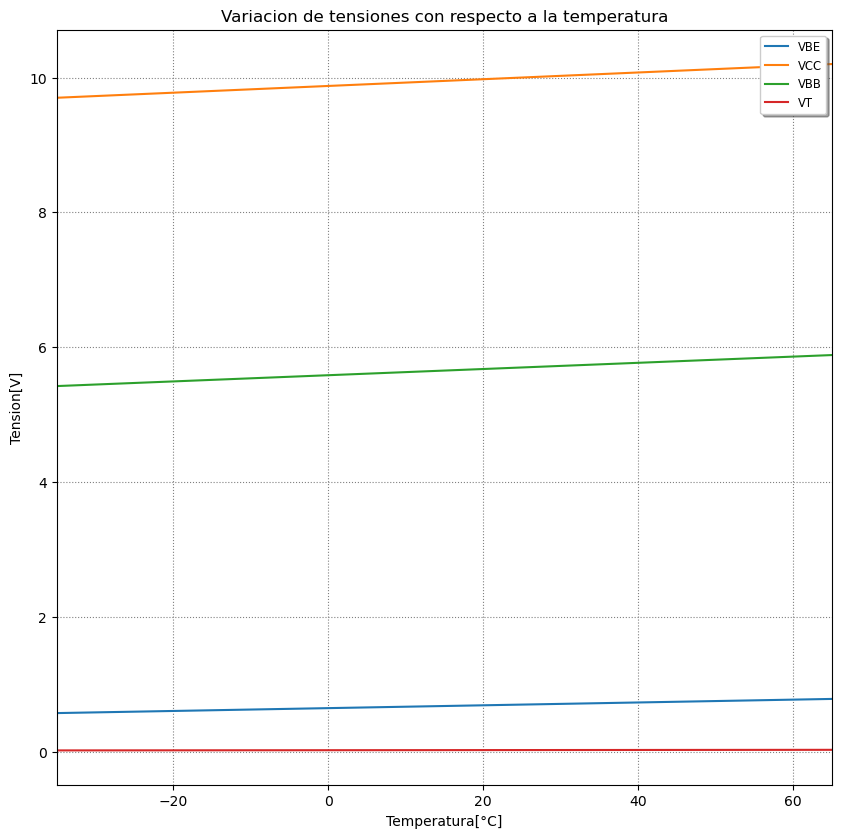

In [7]:
#%%                                    Tensiones
plt.figure(1, figsize=(10, 10), dpi=100)
plt.plot(T, VBE, label='VBE')
plt.plot(T, VCC, label='VCC')
plt.plot(T, VBB, label='VBB')
plt.plot(T, VT, label='VT')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de tensiones con respecto a la temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('Tension[V]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

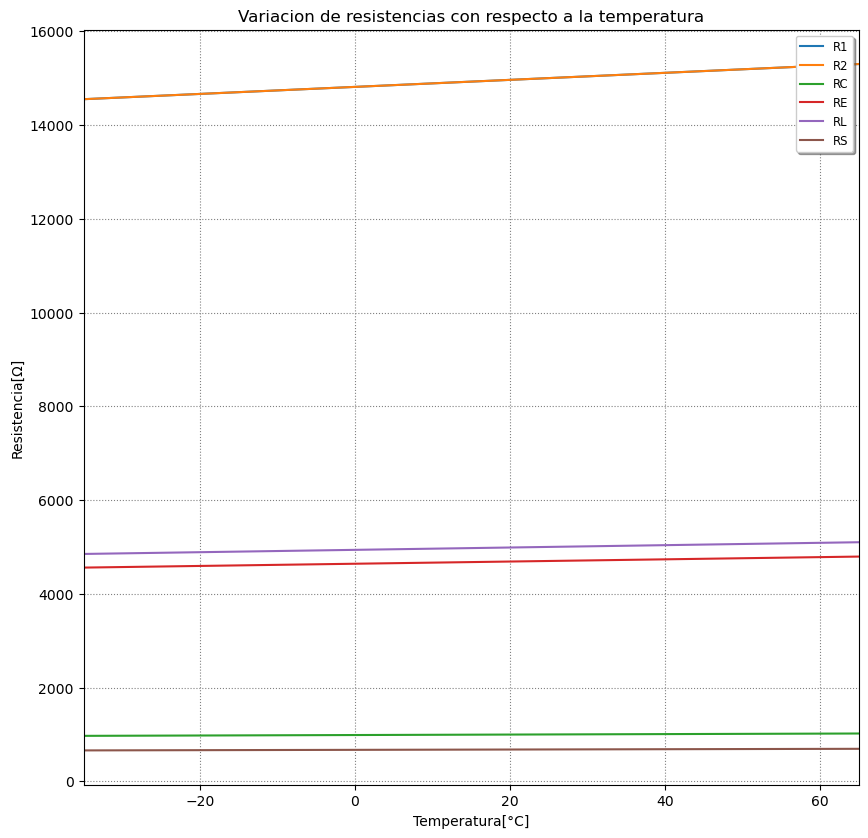

In [8]:
#%%                                  Resistencias
plt.figure(2, figsize=(10, 10), dpi=100)
plt.plot(T, R1, label='R1')
plt.plot(T, R2, label='R2')
plt.plot(T, RC, label='RC')
plt.plot(T, RE, label='RE')
plt.plot(T, RL, label='RL')
plt.plot(T, RS, label='RS')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de resistencias con respecto a la temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('Resistencia[Ω]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

Text(0, 0.5, 'hFE')

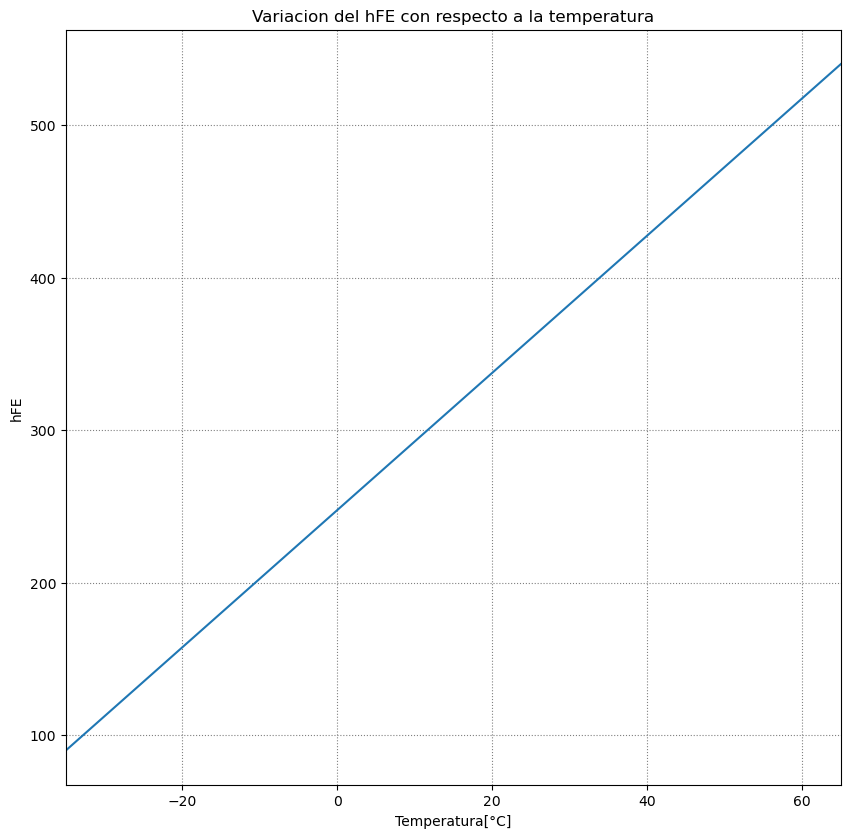

In [9]:
#%%                                       hFE
plt.figure(3, figsize=(10, 10), dpi=100)
plt.plot(T, hFE)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion del hFE con respecto a la temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('hFE')

Text(0, 0.5, 'ICQ[mA]')

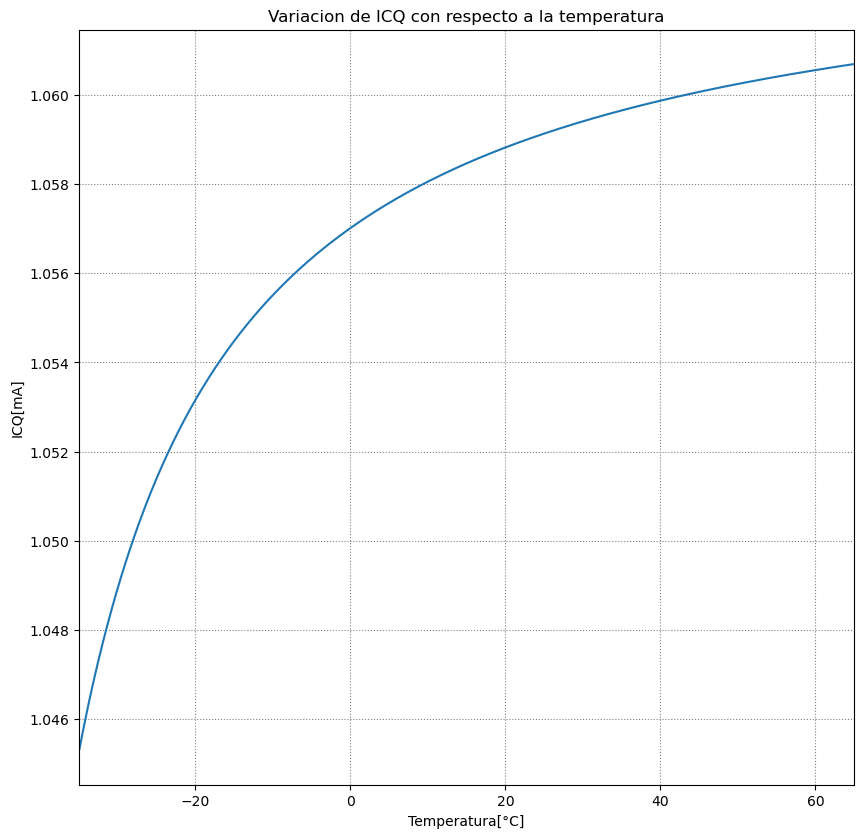

In [10]:
#%%                                      ICQ
plt.figure(4, figsize=(10, 10), dpi=100)
plt.plot(T, ICQ/1e-3) #mA
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de ICQ con respecto a la temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('ICQ[mA]')

Text(0, 0.5, 'VCEQ[V]')

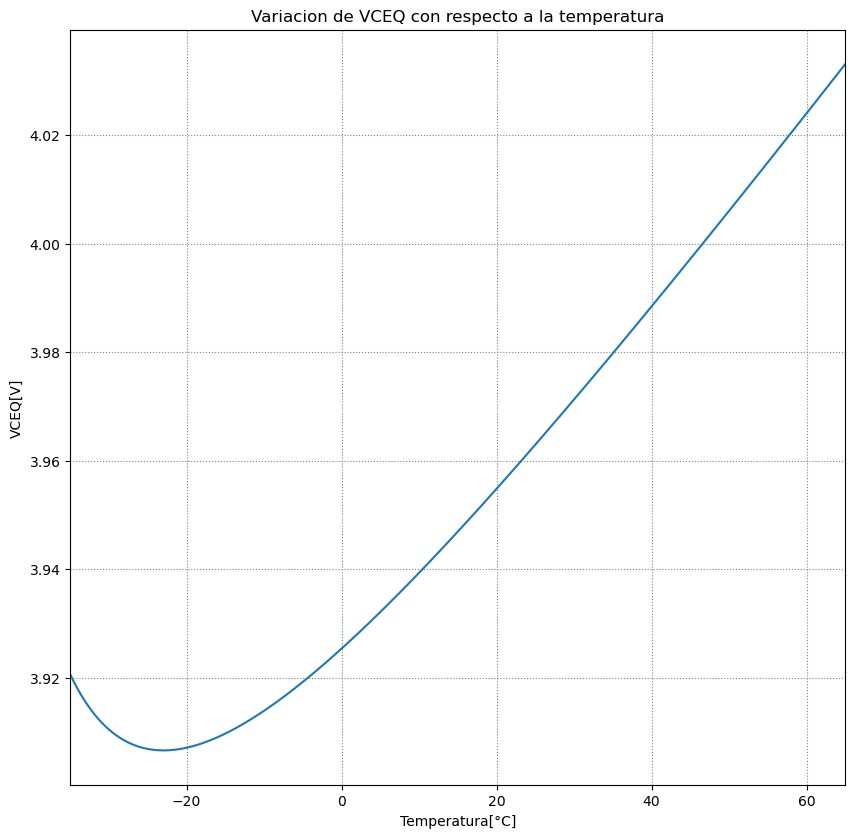

In [11]:
#%%                                      VCEQ
plt.figure(5, figsize=(10, 10), dpi=100)
plt.plot(T, VCEQ)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de VCEQ con respecto a la temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('VCEQ[V]')

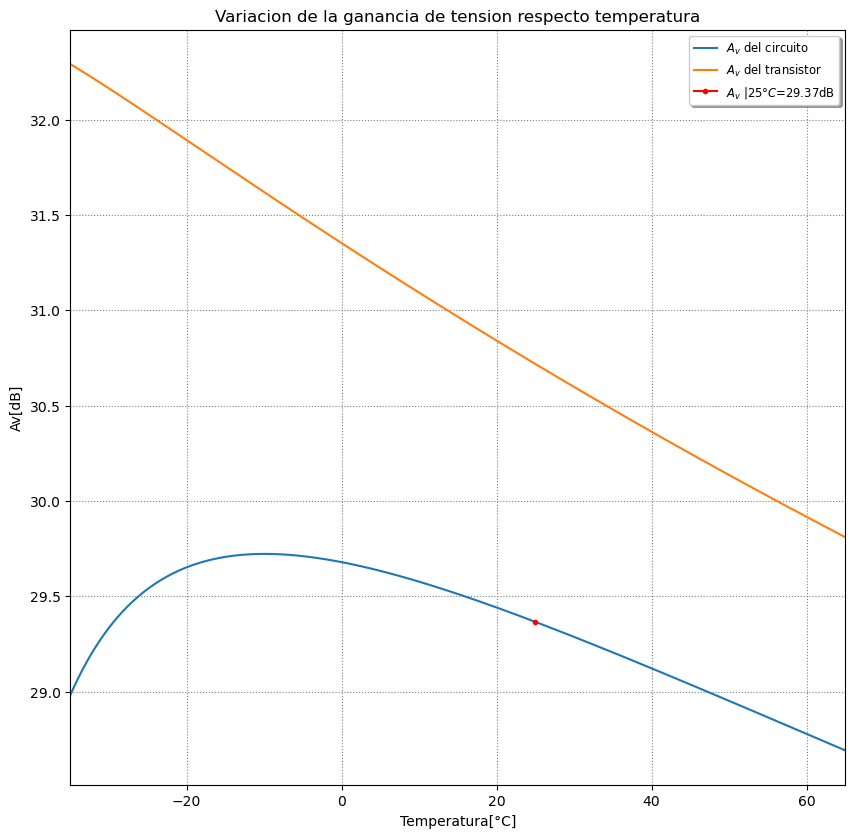

In [12]:
#%%                              Ganancias de tension
fig = plt.figure(6, figsize=(10, 10), dpi=100)
ax = fig.add_subplot(111)
plt.plot(T, 20*np.log10(abs(AVS)), label='$A_v$ del circuito')
plt.plot(T, 20*np.log10(abs(AV)), label='$A_v$ del transistor')
plt.plot(T[i], 20*np.log10(abs(AVS[i])), color='red', marker=".", label=f'$A_v$ $|25°C$={round(20*np.log10(abs(AVS[i])), 2)}dB')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de la ganancia de tension respecto temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('Av[dB]')
plt.legend(loc='upper right', shadow=True, fontsize='small')

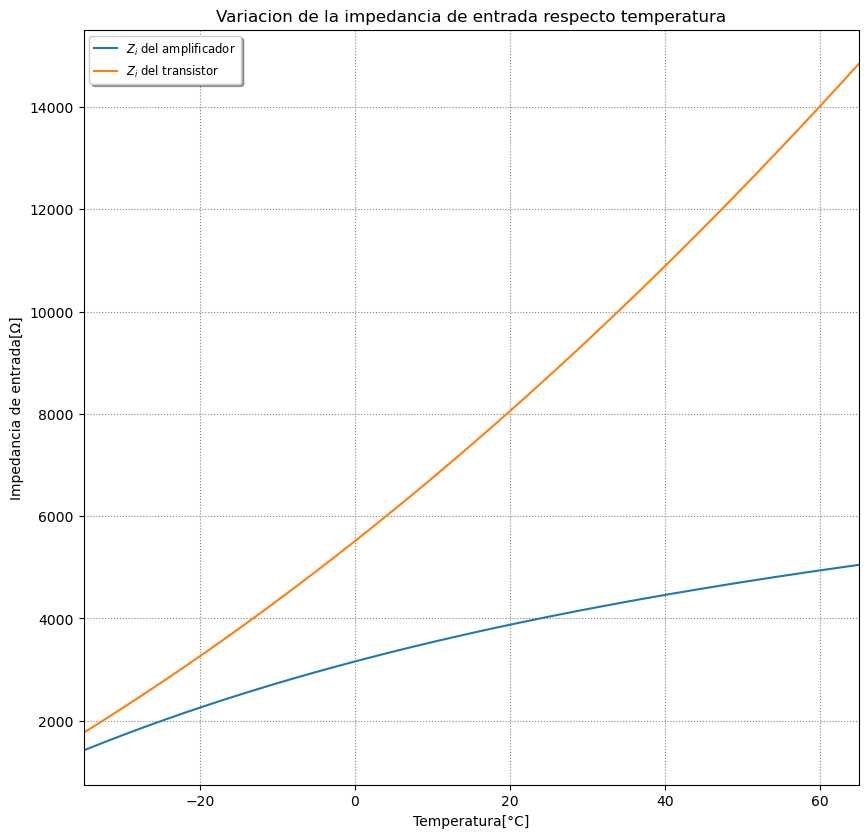

In [13]:
#%%                           Impedancias de entrada
plt.figure(7, figsize=(10, 10), dpi=100)
plt.plot(T, RIA, label='$Z_i$ del amplificador')
plt.plot(T, RI, label='$Z_i$ del transistor')
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de la impedancia de entrada respecto temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('Impedancia de entrada[Ω]')
plt.legend(loc='upper left', shadow=True, fontsize='small')

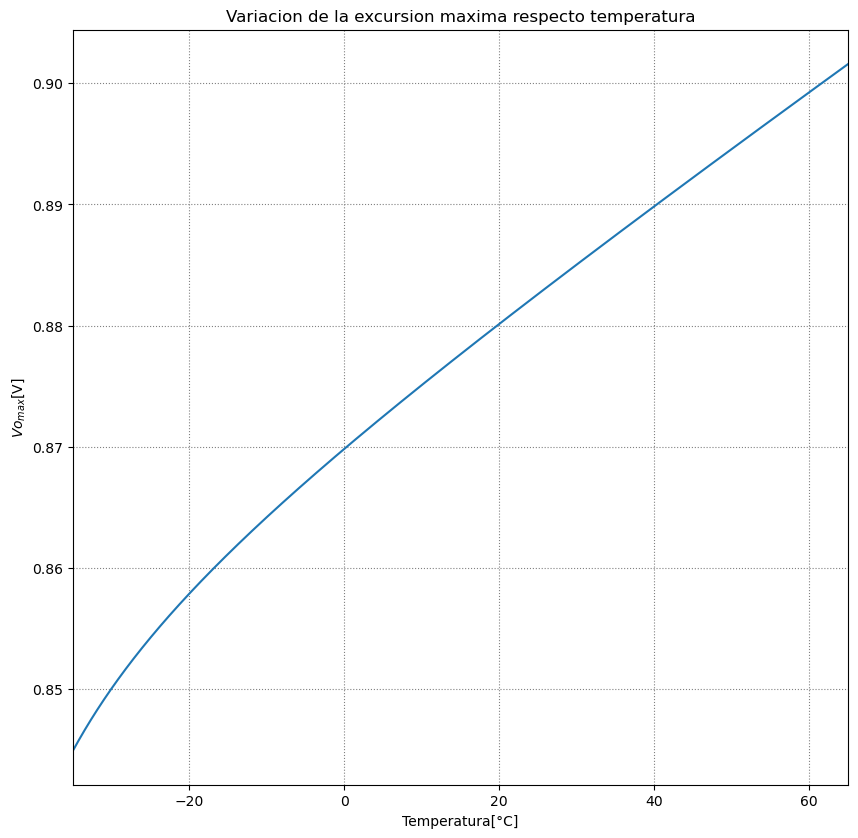

In [14]:
#%%                             Tension de salida
plt.figure(8, figsize=(10, 10), dpi=100)
plt.plot(T, VCE_MAX)
plt.grid(color='gray', linestyle='dotted', linewidth=0.8)
plt.xlim(-35, 65)
plt.title('Variacion de la excursion maxima respecto temperatura')
plt.xlabel('Temperatura[°C]')
plt.ylabel('$Vo_{max}$[V]')

plt.show()

## 2) Simulacion en LTSpice
***
### Circuito en LTSpice:

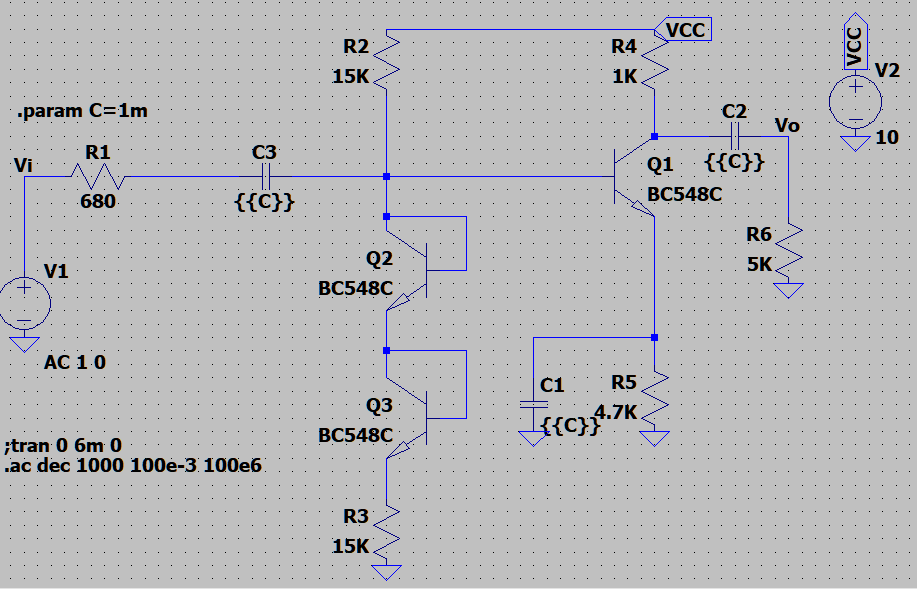

In [15]:
fig2 = Image(filename=('./circuit_LTSpice.png'))
fig2

### Ganancia AVS del circuito:

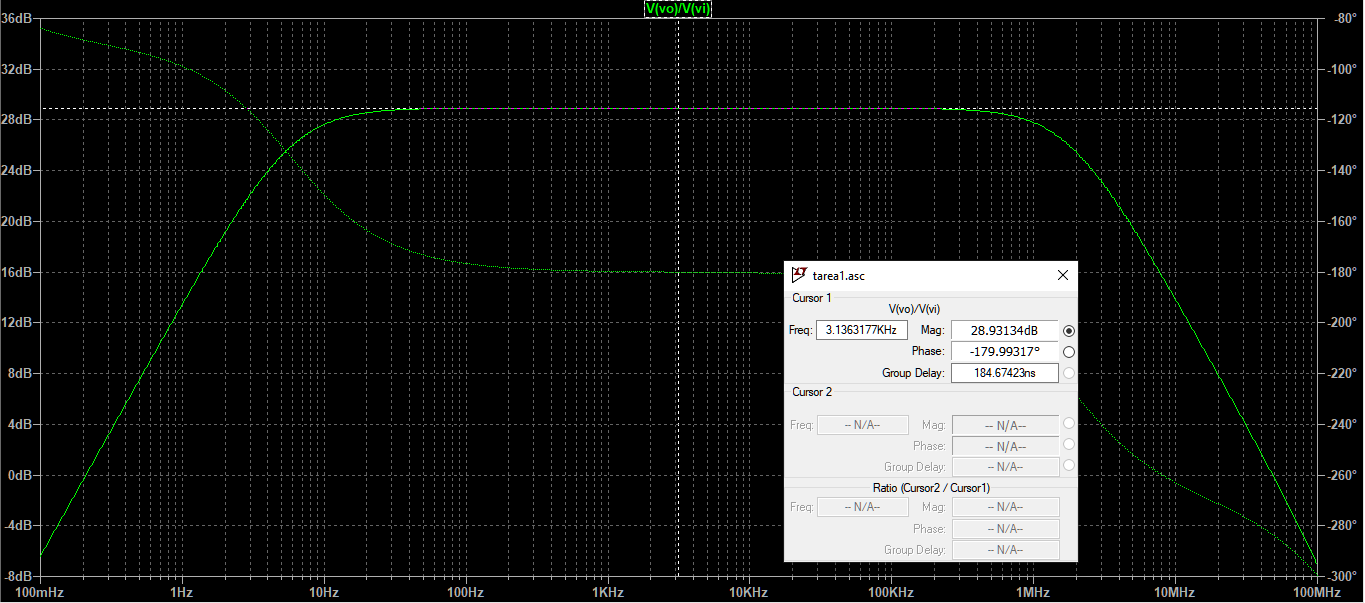

In [16]:
fig = Image(filename=('./AV_LTSpice.png'))
fig

## 3) Conclusiones
***
Como podemos observar hay una diferencia entre la ganancia $A_{vs}$ calculada por el script en Python y el simulado en LTSpice, pero esa diferencia es mínima, por lo que puedo considerar que son similares. Luego como vimos en la teoría este circuito esta polarizado de forma tal que las variaciones frente a los cambios de temperatura sean mínimos, si observamos la grafica de $IC_Q$ vs $Temperatura$ podemos ver que $IC_Q$ varia muy poco, lo mismo sucede con respecto a $VCE_Q$, esto nos quiere decir que el punto de operación del circuito se mantendrá estable frente a los cambios de temperatura, validando de esta manera lo visto en teoría. Por otro lado, en el inciso ***2)*** realice un análisis frecuencial para verificar la ganancia de tensión, pero si hacemos un análisis temporal podemos verificar que la excursión máxima para 25 grados Celsius también se verifica obteniendo un valor aproximado a 880mV para una entrada de 1V máximo, además también verificamos que la deformación se presenta primero en el semiciclo positivo lo que nos dice que la excursión máxima esta dada para que el transistor no entre en la region de corte, es decir por $IC_Q.R_D$.

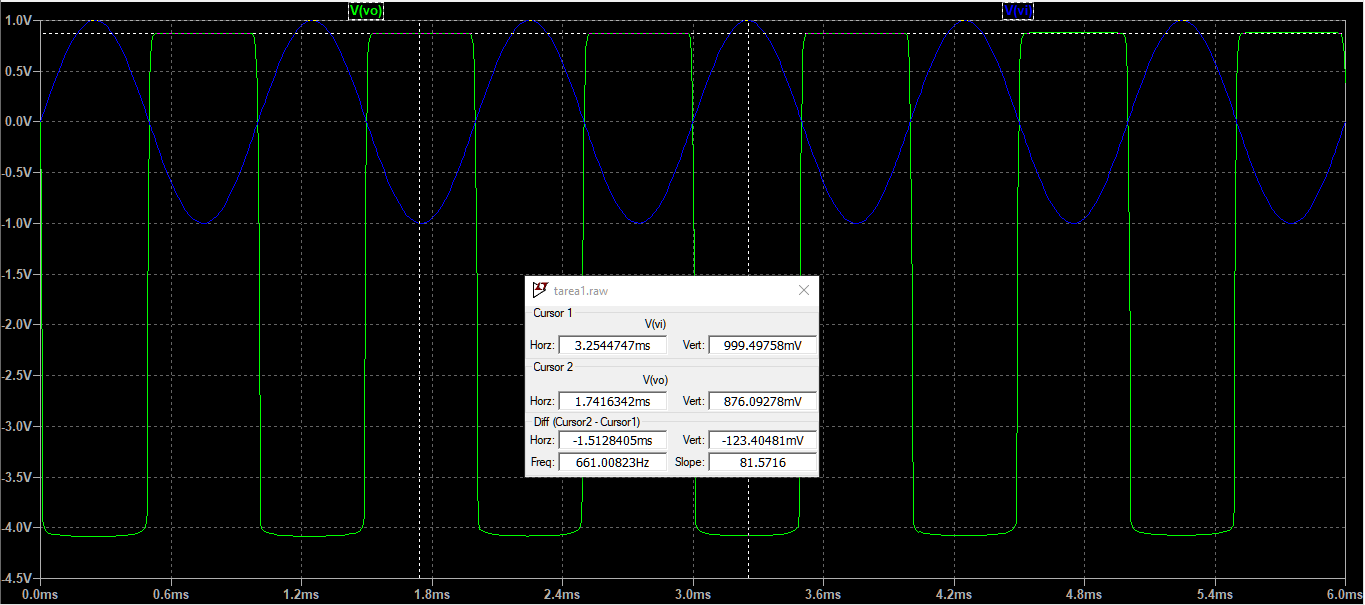

In [17]:
fig = Image(filename=('./Vo_LTSpice.png'))
fig